First you have to define what you mean by correlation. That will depend on your objectives and data, it’s not a statistical question.

The statistical concept of correlation refers to a joint probability distribution from which two variables are drawn. With non-stationary time series, successive values don’t come from the same distribution, so there’s no concept of correlation.

One possibility is to transform the time series so they are stationary. This can sometimes be done by differencing. So instead of asking for the correlation between the S&P500 value and the 10-year treasury interest rate, which does not exist, you ask for the correlation between the S&P500 return and the change in the 10-year treasury yield. This may or may not give insight to your investigation.

Another possibility is to look for another type of relation than correlation. Cointegration is one common approach.

In many cases it helps to start with what you want to know. For example, suppose you are studying the relation between average global temperatures and frequency of natural disasters like hurricanes, droughts and wildfires. Neither time series is stationary because the climate is changing. Calculating a correlation coefficient between them is therefore not meaningful.

What you really want to know, presumably, is how predicted future warming should influence predictions of future natural disasters. A serious answer to this question probably requires extensive climate modeling rather than simple statistical analysis of historical data—but simple statistical analysis can still serve as a sanity check on models and provide prior beliefs.

In this case you might want to take the time series and global components out of the analysis. You could just have a list of natural disasters, and for each one what the local temperature at event initiation (not always a clear concept) was relative to the mean for that location and date. This removes the problem of nonstationarity. Unfortunately it also removes any global or delayed effect of warming, so it could be very misleading. But it’s simple, statistical and objective; and if a model predicts very different results, the modeler should be able to explain why.

In [1]:
import pandas as pd
import numpy as np
import os 
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os

In [2]:
sys.path.insert(1, os.path.join(sys.path[0], '../../../openAi/TS_analysis_TOPIC9/'))

In [3]:
from pyts_utils import descriptive_tools
from sklearn.decomposition import PCA

In [4]:
af=pd.read_csv('antifragilidades_datasets/af.csv')

In [5]:
af.iloc[:,2:].corr()

,af_in_pr,af_in_vl,af_ex_pr,af_ex_vl,af_in_pr2,af_in_vl2,af_ex_pr2,af_ex_vl2
af_in_pr,1.000000,0.671100,-0.047607,-0.011621,0.957643,0.785956,-0.036705,-0.024999
af_in_vl,0.671100,1.000000,-0.008078,0.026799,0.774187,0.959194,-0.003471,0.016606
af_ex_pr,-0.047607,-0.008078,1.000000,0.692871,-0.038237,-0.015104,0.957657,0.802626
af_ex_vl,-0.011621,0.026799,0.692871,1.000000,-0.002612,0.016074,0.789997,0.957202
af_in_pr2,0.957643,0.774187,-0.038237,-0.002612,1.000000,0.823725,-0.028250,-0.014912
af_in_vl2,0.785956,0.959194,-0.015104,0.016074,0.823725,1.000000,-0.009681,0.004890
af_ex_pr2,-0.036705,-0.003471,0.957657,0.789997,-0.028250,-0.009681,1.000000,0.831397
af_ex_vl2,-0.024999,0.016606,0.802626,0.957202,-0.014912,0.004890,0.831397,1.000000


Desde las correlaciones vemos que ex e in contienen informacion distinta matematicamente, sin embargo dado el algoritmo de calculo de antifragilidad, podemos considerar que poseen la misma informacion sobre la antifragilidad de los paises en el tiempo? Entonces nos quedamos solo con ex por tener mas datos. Para conservar la mayor cantidad de informacion de antifragilidad data por volumen o precio, podemos projectar al primer PCA considerando las dimensiones af_ex_pr, af_ex_vl

In [6]:
af = af.rename(columns={'Unnamed: 0':'country','Unnamed: 1':'year'})

In [7]:
af=af.iloc[:,[0,1,4,5,8,9]]

In [8]:
af.iloc[:,2:].corr()

,af_ex_pr,af_ex_vl,af_ex_pr2,af_ex_vl2
af_ex_pr,1.000000,0.692871,0.957657,0.802626
af_ex_vl,0.692871,1.000000,0.789997,0.957202
af_ex_pr2,0.957657,0.789997,1.000000,0.831397
af_ex_vl2,0.802626,0.957202,0.831397,1.000000


In [9]:
toproject_af=af.dropna(axis=0)

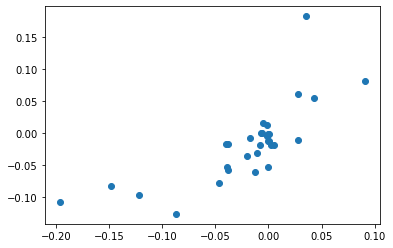

In [41]:
plt.scatter(toproject_af[toproject_af['country']=='Mexico']['af_ex_pr'],toproject_af[toproject_af['country']=='Mexico']['af_ex_vl'])

<AxesSubplot:xlabel='year'>

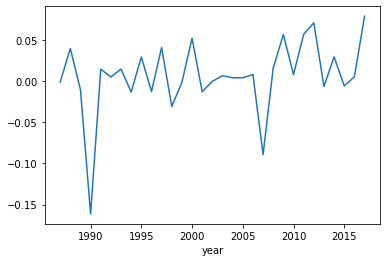

In [13]:
ex_pr['United States of America'].plot()

In [35]:
_=af.pivot_table(index='year',columns='country',values='af_ex_pr')

<AxesSubplot:xlabel='year'>

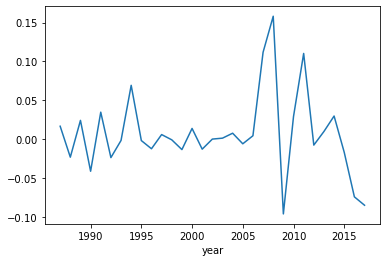

In [38]:
_['Canada'].plot()

In [33]:
clean_afs['af_ex_pca']=-clean_afs['af_ex_pca']

<AxesSubplot:xlabel='year'>

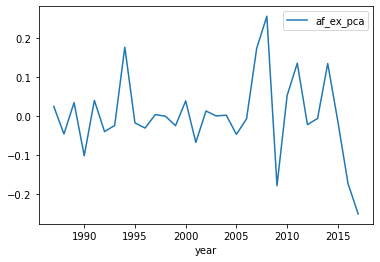

In [37]:
(clean_afs[clean_afs['country']=='Canada'][['year','af_ex_pca']]).plot(x='year',y='af_ex_pca')

In [17]:
pca=PCA(n_components=1,).fit(toproject_af.iloc[:,2:],)

In [18]:
clean_afs = pca.fit_transform(toproject_af.iloc[:,2:])

In [19]:
pca.explained_variance_ratio_.cumsum()

array([0.87781833])

In [20]:
clean_afs = pd.DataFrame(data=clean_afs,columns=['af_ex_pca'])

In [21]:
clean_afs['country'] = toproject_af.reset_index()['country']
clean_afs['year'] = toproject_af.reset_index()['year']

In [19]:
# clean_afs.to_csv('af_ex_pca.csv')

Tenemos 184 paises importadores y 244 paises exportadores.

Podria ser el caso que los paises que tenemos mas paises exportadores que importadores debido a que los paises que exportan se puede suponer que lo hacen porque les conviene y les sobra los suficiente para ademas poder exportar. Los importadores podemos pensar que importan porque lo necesitan? Podria significar que los paises que no tienen muchos registros como importadores podrian ser los NO-fragiles debido a que no necesitan importar cosas para estar bien?? Los paises que aparecen como importadores pocas veces, aparecen como exportadores muchas veces? Existe esa simetria?? O son asimetricos y pasa que aunque aparescan pocas veces como importadores, tambien aparecen pocos registros de ellos como exportadores??

In [39]:
ex_pr = af.pivot_table(index='year',columns='country',values='af_ex_pr')

<AxesSubplot:xlabel='year'>

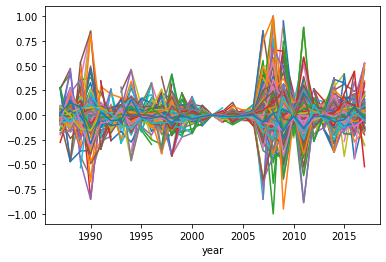

In [40]:
ex_pr.plot(legend=False)

In [62]:
from sklearn.preprocessing import power_transform, StandardScaler

In [171]:
yeo_johnson=power_transform(ex_pr.dropna(axis=1).T,standardize=False)

/home/rogelio/anaconda3/envs/geopandas_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [172]:
yeo_johnson = pd.DataFrame(data=yeo_johnson,index=ex_pr.dropna(axis=1).columns.values,columns=ex_pr.dropna(axis=1).index)

In [174]:
yeo_johnson.T.corr()['United States of America'][yeo_johnson.T.corr()['United States of America']>.4]

El Salvador                 0.404784
Kenya                       0.408982
Morocco                     0.491556
Panama                      0.463772
Switzerland                 0.442630
United States of America    1.000000
Unspecified Area            0.581881
Viet Nam                    0.486588
Zimbabwe                    0.423555
Name: United States of America, dtype: float64

In [137]:
yeo_johnson.T.corr() # non std

,Albania,Argentina,Australia,Austria,Bolivia (Plurinational State of),Brazil,Bulgaria,Canada,Chile,"China, Hong Kong SAR",...,Turkey,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,Unspecified Area,Uruguay,Viet Nam,Zambia,Zimbabwe
Albania,1.000000,-0.248980,0.378905,0.329301,-0.458018,-0.308883,-0.244204,-0.095528,-0.642666,0.211168,...,-0.092797,-0.553951,-0.628145,0.110147,0.273780,-0.227619,0.157038,0.064405,-0.227063,0.004209
Argentina,-0.248980,1.000000,0.224847,0.149958,-0.060835,-0.122173,0.037820,0.560972,0.158352,0.342575,...,-0.672614,-0.431480,0.062956,-0.221755,0.343430,0.483955,0.163068,0.012213,-0.474609,0.055369
Australia,0.378905,0.224847,1.000000,0.190880,-0.568754,-0.348874,-0.455748,0.130871,-0.080123,0.096888,...,0.118384,-0.269127,-0.460260,-0.032129,0.307283,0.308575,0.396802,0.420959,-0.452195,0.154729
Austria,0.329301,0.149958,0.190880,1.000000,-0.166333,-0.320478,0.082535,-0.103264,-0.283566,0.020030,...,-0.308149,-0.402176,-0.201645,-0.028483,0.126872,0.110882,0.069260,-0.124564,-0.212628,0.039243
Bolivia (Plurinational State of),-0.458018,-0.060835,-0.568754,-0.166333,1.000000,-0.087203,0.318489,-0.154606,0.246603,0.021161,...,-0.129238,0.292247,0.531207,0.064129,-0.293686,0.042235,-0.192139,-0.251667,0.292330,-0.163658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unspecified Area,-0.227619,0.483955,0.308575,0.110882,0.042235,-0.128023,-0.116277,0.115469,0.498537,0.057038,...,-0.176826,0.037184,0.282119,0.237584,0.581881,1.000000,0.329849,0.523530,-0.226484,0.379764
Uruguay,0.157038,0.163068,0.396802,0.069260,-0.192139,-0.387936,-0.509976,0.406377,-0.081666,0.260637,...,-0.147963,-0.305421,-0.340727,-0.052103,0.356223,0.329849,1.000000,0.300879,-0.463205,0.651302
Viet Nam,0.064405,0.012213,0.420959,-0.124564,-0.251667,0.213747,-0.315727,-0.100555,0.095041,-0.182976,...,0.327440,0.238586,-0.294767,0.332525,0.486588,0.523530,0.300879,1.000000,-0.141182,0.567653
Zambia,-0.227063,-0.474609,-0.452195,-0.212628,0.292330,0.398673,0.470642,-0.667879,0.313361,-0.372769,...,0.446050,0.514543,0.315589,0.243796,-0.066749,-0.226484,-0.463205,-0.141182,1.000000,-0.160032


<AxesSubplot:xlabel='year'>

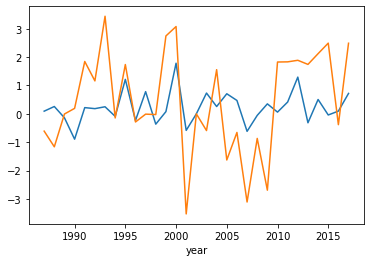

In [168]:
yeo_johnson.T['United States of America'].plot()
yeo_johnson.T['Albania'].plot()

<AxesSubplot:xlabel='year'>

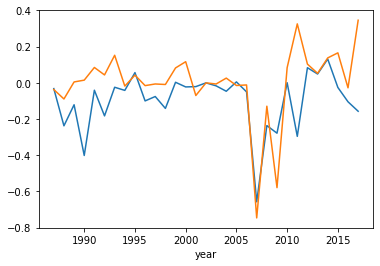

In [163]:
ex_pr['Panama'].plot()
ex_pr['Albania'].plot()

<AxesSubplot:xlabel='year'>

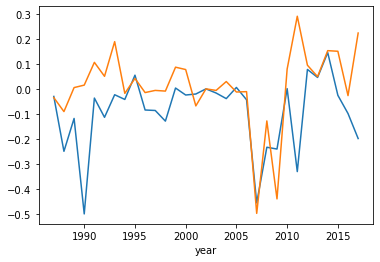

In [164]:
yeo_johnson.T['Panama'].plot()
yeo_johnson.T['Albania'].plot()

In [46]:
yeo_johnson.T.corr() # std true

,Albania,Argentina,Australia,Austria,Bolivia (Plurinational State of),Brazil,Bulgaria,Canada,Chile,"China, Hong Kong SAR",...,Turkey,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,Unspecified Area,Uruguay,Viet Nam,Zambia,Zimbabwe
Albania,1.000000,-0.266881,-0.019717,-0.090908,-0.147407,-0.232001,-0.003529,0.132053,-0.228673,-0.007858,...,0.011615,0.001005,-0.072310,0.195553,0.406711,-0.019748,-0.201256,0.061245,-0.154291,-0.178013
Argentina,-0.266881,1.000000,0.029098,0.191101,0.026400,0.135269,0.268515,0.422540,0.098766,0.112102,...,-0.354577,-0.491966,-0.199316,-0.205226,0.034209,-0.000027,-0.199097,-0.107634,-0.010706,-0.023452
Australia,-0.019717,0.029098,1.000000,0.209660,-0.398345,-0.234130,-0.343622,-0.205303,0.161339,-0.011201,...,0.020839,-0.059594,0.040527,-0.056046,-0.367929,-0.040333,0.063820,0.167445,-0.154445,0.021556
Austria,-0.090908,0.191101,0.209660,1.000000,-0.191613,-0.145295,-0.173996,-0.014193,-0.195253,-0.213603,...,-0.279016,-0.336991,0.036506,-0.167655,-0.190595,0.016490,0.204817,-0.161298,-0.121979,0.269448
Bolivia (Plurinational State of),-0.147407,0.026400,-0.398345,-0.191613,1.000000,-0.215061,0.108816,-0.199520,-0.068824,0.104692,...,-0.193273,0.087436,-0.097665,0.389404,0.161332,0.015000,0.129391,-0.099540,0.201617,-0.061375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unspecified Area,-0.019748,-0.000027,-0.040333,0.016490,0.015000,0.050129,-0.059885,-0.023212,0.281497,0.084719,...,0.148994,-0.034430,0.229067,0.294408,0.276532,1.000000,0.192487,0.522587,-0.281807,0.061660
Uruguay,-0.201256,-0.199097,0.063820,0.204817,0.129391,-0.181207,-0.360890,-0.159071,-0.148643,0.047103,...,-0.241252,-0.068644,0.142287,-0.011866,-0.024960,0.192487,1.000000,-0.001502,-0.033912,0.424587
Viet Nam,0.061245,-0.107634,0.167445,-0.161298,-0.099540,0.029306,-0.076209,-0.111914,0.081910,0.008192,...,0.342280,0.148341,-0.190814,0.123935,0.110008,0.522587,-0.001502,1.000000,-0.337201,-0.021598
Zambia,-0.154291,-0.010706,-0.154445,-0.121979,0.201617,0.011077,0.164215,-0.196935,0.106959,-0.110309,...,0.040269,-0.003519,0.146567,-0.033417,-0.002359,-0.281807,-0.033912,-0.337201,1.000000,0.094997
